In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

Required Pre-processing of data

In [5]:
data=pd.read_csv('outputlast1.csv')

In [6]:
data.dropna(inplace=True)

In [7]:
data.tail()

,Unnamed: 0,password,strength
771313,771313,woepie192,medium
771314,771314,@)o#88o/Ed8#2Zx,strong
771315,771315,447iyt,weak
771316,771316,kakashi10,medium
771317,771317,:E):4t/gAIv7&77,strong


In [8]:
#datframe consists of 3 classes, strong-medium-weak, however weak||medium =  weak
Strength_column=data['strength']
Str=[]

In [9]:
#return the classes 
for token in Strength_column:
    if token == 'medium':
        Str.append(0)
    elif token == 'weak':
        Str.append(0)
    else:
        Str.append(2)

In [10]:
data['Y']=Str

In [11]:
data.columns=['index','password','strength','Y']

In [12]:
data.drop(['index'],axis=1,inplace=True)

Since NLP requires tokenization of words and word vectors, the characters of the word are considered as tokens and are vectorized accordingly

In [13]:
def split_letters(word):
    return [char for char in word]

In [14]:
data['new']=data['password'].map(lambda x: split_letters(x))

In [15]:
data['new']

0                                    [m, e, h, d, i, 2, 3]
1                     [2, s, 0, i, 0, t, f, h, c, x, r, e]
2                                       [v, v, r, 1, 2, 3]
3            [6, 4, 2, 2, Q, M, ), r, h, x, g, #, Q, <, 8]
4         [t, C, x, O, Q, 0, T, Y, w, M, A, k, T, N, n, E]
                                ...                       
771313                         [w, o, e, p, i, e, 1, 9, 2]
771314       [@, ), o, #, 8, 8, o, /, E, d, 8, #, 2, Z, x]
771315                                  [4, 4, 7, i, y, t]
771316                         [k, a, k, a, s, h, i, 1, 0]
771317       [:, E, ), :, 4, t, /, g, A, I, v, 7, &, 7, 7]
Name: new, Length: 770199, dtype: object

In [16]:
data.Y.value_counts()

0    587330
2    182869
Name: Y, dtype: int64

In [17]:
X=data['new']
y=data['Y']

In [18]:
y=to_categorical(y)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
#fit the tokenizer on the input data and tokenize the characters
tokenizer=Tokenizer(filters='nan',split=',',lower=False)

In [25]:
tokenizer.fit_on_texts(X)

In [28]:
x=tokenizer.texts_to_sequences("@KJ@$*asdHello")

In [30]:
x #characters are tokenized

[[63],
 [53],
 [54],
 [63],
 [65],
 [64],
 [],
 [12],
 [24],
 [56],
 [5],
 [21],
 [21],
 [7]]

In [31]:
tokenizer.sequences_to_texts(x) #respective character representation

['@', 'K', 'J', '@', '$', '*', '', 's', 'd', 'H', 'e', 'l', 'l', 'o']

In [32]:
X_train=tokenizer.texts_to_sequences(X_train)

In [33]:
X_test=tokenizer.texts_to_sequences(X_test)

In [35]:
V=len(tokenizer.index_word) #keep count of the total no. of characters for the embedding layer

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
X_train=pad_sequences(X_train,maxlen=15,padding="pre") #optimal password must have a length of 15 and hence chosen
X_test=pad_sequences(X_test,maxlen=15,padding='pre')

In [40]:
X_train.shape

(516033, 15)

In [42]:
tokenizer.word_index #each character and their corresponding index

{'a': 1,
 '1': 2,
 '2': 3,
 '0': 4,
 'e': 5,
 'i': 6,
 'o': 7,
 '3': 8,
 '9': 9,
 'n': 10,
 'r': 11,
 's': 12,
 '5': 13,
 '4': 14,
 '8': 15,
 '7': 16,
 '6': 17,
 'u': 18,
 'm': 19,
 't': 20,
 'l': 21,
 'k': 22,
 'y': 23,
 'd': 24,
 'c': 25,
 'p': 26,
 'g': 27,
 'h': 28,
 'b': 29,
 'w': 30,
 'j': 31,
 'z': 32,
 'v': 33,
 'f': 34,
 'x': 35,
 'q': 36,
 'A': 37,
 'M': 38,
 'N': 39,
 'Q': 40,
 'T': 41,
 'D': 42,
 'O': 43,
 'E': 44,
 'I': 45,
 '#': 46,
 'Y': 47,
 'U': 48,
 'S': 49,
 'R': 50,
 'C': 51,
 'G': 52,
 'K': 53,
 'J': 54,
 'B': 55,
 'H': 56,
 'F': 57,
 'W': 58,
 'V': 59,
 'Z': 60,
 'X': 61,
 '.': 62,
 '@': 63,
 '*': 64,
 '$': 65,
 '/': 66,
 '?': 67,
 '&': 68,
 '(': 69,
 '%': 70,
 ')': 71,
 '|': 72,
 '>': 73,
 '<': 74,
 '~': 75,
 ':': 76,
 '=': 77,
 'L': 78,
 'P': 79,
 '-': 80,
 '_': 81,
 '!': 82,
 ' ': 83,
 '+': 84,
 '\\': 85,
 ';': 86,
 '^': 87,
 '[': 88,
 ']': 89,
 '{': 90,
 '}': 91,
 '`': 92,
 '"': 93}

In [54]:
import numpy as np


In [55]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [56]:
y_test=np.array(y_test)
y_train=np.array(y_train)

In [58]:
#CREATE MODEL LSTM, WITH EACH LETTER VECTORIZED IN SHAPE (16,)
i = Input(shape=X_test[0].shape)
x = Embedding(V+1, 16, input_length=15, mask_zero=True)(i)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax')(x)

model1 = Model(i, x)


In [59]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 16)            1504      
_________________________________________________________________
dropout (Dropout)            (None, 15, 16)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            20736     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195   

In [60]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [61]:
history=model1.fit(X_train,y_train,epochs=3,validation_split=0.2,verbose=1,batch_size=16)

Epoch 1/3
25802/25802 [==============================] - 1045s 40ms/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 2/3
25802/25802 [==============================] - 1049s 41ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 3/3
25802/25802 [==============================] - 1006s 39ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9999


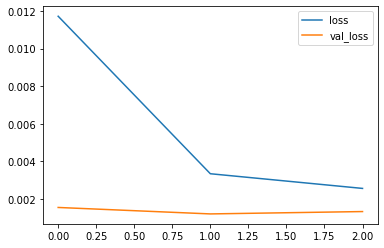

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

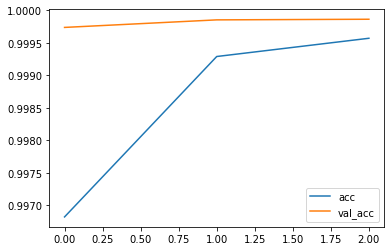

In [64]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [65]:
predicts=model1.predict(X_test,batch_size=10,verbose=0)

In [66]:
newp=np.argmax(predicts,axis=1)

In [67]:
newy=np.argmax(y_test,axis=1)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(newp,newy)

0.999874098030421

CALL below function to check strength of password:

In [48]:
index=tokenizer2.word_index
def predictor(word):
    l=split_letters(word)
    m=[]
    for letter in l:
        m.append(index[letter])
    m=np.array(m)
    m=np.reshape(m,(1,-1))
 
    l=pad_sequences(m,maxlen=15,padding='pre')
    k=model.predict(l)
    p=np.argmax(k,axis=1)
    if p[0]==0:
        return 'weak'
    elif p[0]==1:
        return 'weak'
    else:
        return 'strong'

In [59]:
password='34&!23332@$!1#'
output=predictor(password)

In [60]:
output #the model identifies that a longer length is required for a stronger password

'strong'

In [61]:
password='34&!@$!1#'
output=predictor(password)

In [63]:
output #the model gives a weak output although the characters are random due to the lesser length

'weak'

In [ ]:
model1.save('PASSWORD_STRENGTH2.h5')

In [45]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model

In [99]:
import pickle
# saving
with open('lstm_passwrd2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:

# loading
with open('lstm_passwrd2.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)

In [47]:
model=load_model('PASSWORD_STRENGTH2.h5')